### **Implementation of ANN in Keras**

```
Q1:-
 Install and load the latest versions of TensorFlow and Keras. Print their versions.
```

In [360]:
!pip install tensorflow

DEPRECATION: Loading egg at c:\users\abhi\anaconda3\lib\site-packages\catboost-1.2.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\abhi\anaconda3\lib\site-packages\cnnclassifier-0.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\abhi\anaconda3\lib\site-packages\data_science_101_chaleges-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\abhi\anaconda3\lib\site-packages\diamond_price_predection-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\abhi\anaconda3\lib\site-packages\gr

In [361]:
import tensorflow as tf

In [362]:
print(f"Tensorflow Version {tf.__version__}")

Tensorflow Version 2.15.0


```
Q2. Load the Wine Quality dataset and explore its dimensions.

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
df=pd.read_csv("wine.csv")

In [365]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


```
Q3:-
Check for null values, identify categorical variables, and encode them.

In [366]:
df.shape

(1599, 12)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [368]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

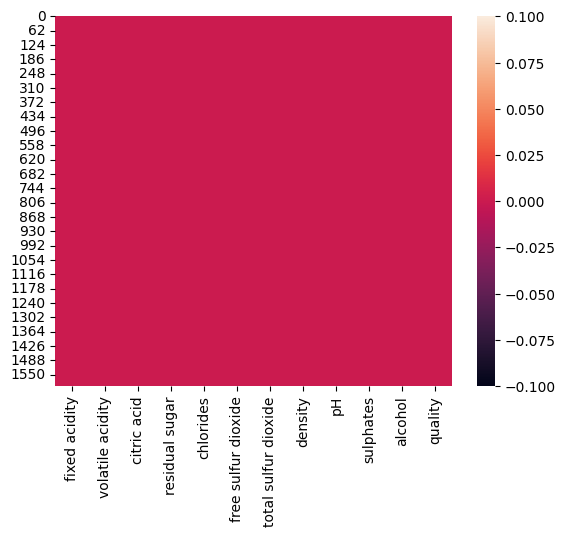

In [369]:
sns.heatmap(df.isnull())

In [370]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [371]:
df["quality"].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [372]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
df["Quality"]=encoder.fit_transform(df["quality"])
df.drop(["quality"],axis=1,inplace=True)

In [373]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


```
Q4:-
Separate the features and target variables from the dataset.

In [374]:
x=df.drop(["Quality"],axis=1)
y=df["Quality"]

```
Q5:-
Perform a train-test split, dividing the data into training, validation, and test datasets.

In [375]:
from sklearn.model_selection import train_test_split

In [376]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [377]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [378]:
x_train,x_valid,y_train,y_valid=train_test_split(X_train,Y_train,test_size=0.20,random_state=42)

In [379]:
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((1023, 11), (1023,), (256, 11), (256,))

In [380]:
validation_data=(x_valid,y_valid)

In [381]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


```
Q6:- 
Scale the dataset using an appropriate scaling technique.

In [382]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [383]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(X_test)


In [384]:
x_train_scaled

array([[-0.36458197,  0.27028307, -0.88452628, ..., -1.50331912,
        -0.96231644, -0.61284241],
       [ 2.08646306, -0.82422292,  1.09972703, ..., -0.98778743,
        -0.29662295, -0.13057021],
       [ 0.86094055, -0.16751933,  1.09972703, ..., -0.02116552,
         0.70191728,  0.25524755],
       ...,
       [ 2.611687  , -1.26202532,  2.37168427, ..., -0.73002159,
         0.59096836,  0.35170199],
       [-0.4812984 ,  0.84489871, -1.03716115, ...,  0.4299247 ,
        -0.6294697 ,  0.44815643],
       [-1.06488055,  0.46182161, -1.39330918, ...,  0.94545638,
        -0.07472512, -1.19156904]])

```
Q7:-
Design and implement at least two hidden layers and an output layer for the binary categorical
variables.

In [385]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential

In [386]:
LAYER=[
    
    keras.layers.Dense(1280,activation="relu",name="Hidden-Layer1",input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64,activation="relu",name="Hidden-Layer2"),
    keras.layers.Dense(32,activation="relu",name="Hidden-Layer3"),
    keras.layers.Dense(1,activation="sigmoid",name="Output-Layer"),
]

```
Q8:- 
Create a Sequential model in Keras and add the previously designed layers to it.

In [387]:
model=Sequential()

In [388]:
models=Sequential(LAYER)

```
Q9:-
Print the summary of the model architecture.

In [389]:
models.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 1280)              15360     
                                                                 
 Hidden-Layer2 (Dense)       (None, 64)                81984     
                                                                 
 Hidden-Layer3 (Dense)       (None, 32)                2080      
                                                                 
 Output-Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 99457 (388.50 KB)
Trainable params: 99457 (388.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


```
Q11:-
Compile the model with the specified loss function, optimizer, and metrics.

In [390]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

```
Q12:- 
Fit the model to the training data using appropriate batch size and number of epochs.

In [391]:
from keras.callbacks import EarlyStopping
mcp=EarlyStopping(patience=10)

In [392]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid),batch_size=32,callbacks=mcp)

Epoch 1/50
32/32 [==============================] - 1s 8ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 7/50
 1/32 [..............................] - ETA: 0s - loss: 4.2036 - accuracy: 0.0000e+00

32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5626 - accuracy: 0.0020 - val_loss: 5.1624 - val_accuracy: 0.0000e+00


```
Q13:-
Obtain the model's parameters (weights and biases).

In [393]:
models.get_weights()

[array([[-0.00804356, -0.06502832, -0.01428818, ..., -0.05970984,
          0.04653445,  0.06132355],
        [-0.01274704,  0.02693719,  0.00979153, ...,  0.01473992,
         -0.031782  , -0.04376374],
        [-0.00264142, -0.03977032, -0.03076397, ..., -0.04559347,
          0.03038038,  0.05357718],
        ...,
        [ 0.04662933,  0.05077749,  0.04659946, ...,  0.04402147,
          0.02945451,  0.06707019],
        [-0.03757016,  0.03521848,  0.05875342, ..., -0.00271559,
         -0.04322511,  0.03437571],
        [ 0.03075398, -0.02978906,  0.04517034, ..., -0.02434276,
          0.0660399 , -0.00793292]], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([[ 0.02689674, -0.03025155,  0.04036469, ..., -0.0357901 ,
          0.00275575,  0.06573708],
        [ 0.01949644,  0.02753867,  0.04543953, ..., -0.06288456,
         -0.00754367,  0.00765745],
        [ 0.00596102, -0.00859418, -0.06099053, ...,  0.01101258,
          0.02758884, -0.03361062]

```
Q14:- 
Store the model's training history as a Pandas DataFrame.

In [394]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,4.562644,0.001955,5.162355,0.0
1,4.562644,0.001955,5.162355,0.0
2,4.562645,0.001955,5.162355,0.0
3,4.562644,0.001955,5.162355,0.0
4,4.562644,0.001955,5.162355,0.0
5,4.562644,0.001955,5.162355,0.0
6,4.562644,0.001955,5.162355,0.0
7,4.562644,0.001955,5.162355,0.0
8,4.562644,0.001955,5.162355,0.0
9,4.562644,0.001955,5.162355,0.0


```
Q15:- 
Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: >

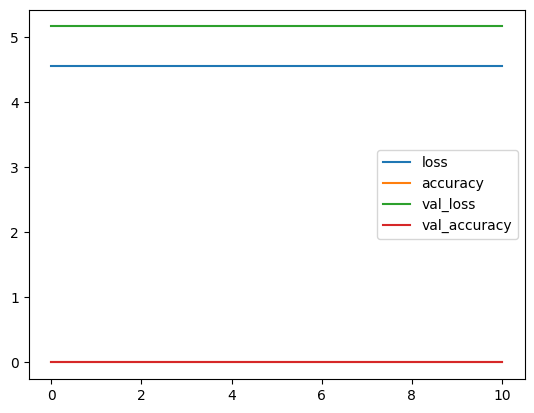

In [395]:
pd.DataFrame(history.history).plot()

```
Q16:- 
Evaluate the model's performance using the test dataset and report relevant metrics.

In [396]:
loss = model.evaluate(x_test_scaled, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 6.3301 - accuracy: 0.0750


In [397]:
predictions = models.predict(x_test_scaled)

10/10 [==============================] - 0s 1ms/step


In [398]:
predictions_df = pd.DataFrame(predictions, columns=['Predicted Quality'])

In [399]:
predictions_df

,Predicted Quality
0,0.519896
1,0.518045
2,0.529403
3,0.503203
4,0.508392
...,...
315,0.533692
316,0.493331
317,0.524109
318,0.506400
